- `T` seconds
- `rate`, `r` kHz
- `60` FPS
- `1920 x 1080` FullHD 16:9
- нужно учитывать что нужно достаточно семплов взять чтобы частота по найквисту хотя бы до `1kHz` была (а лучше `5kHz`)
- нужно чтобы кадры realtime с аудио ехали. Возможно это не такая уж и проблема

In [94]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]
# plt.rcParams['figure.figsize'] = [12, 12]

In [9]:
T = 2 # seconds
r = 44100 # sampling rate
N = r * T

t = np.linspace(0, T, N)
f = np.linspace(50, 250, N)
s = np.sin(2 * np.pi * f * t) # signal

In [12]:
f_n = 1080 # height of video, unlike fft its independent from chunk_size, choose it whatever you like

In [15]:
t.shape

(88200,)

In [3]:
n = 10
x = np.arange(n)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
nperseg  = 4
noverlap = 1
step    = nperseg - noverlap
shape   = ((x.shape[-1] - noverlap) // step, nperseg)
strides = (step * x.strides[-1], x.strides[-1])
result  = np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)
print(shape)
# print(strides)
print(result)

(3, 4)
[[0 1 2 3]
 [3 4 5 6]
 [6 7 8 9]]


# `60` `1920 x 1080` frames per `1` second 
- audio: minimal overlap (max step) <br>
- video: `np.roll` `1px` per frame
    - if `1px` per frame, 60 frames, spectrogram width = 

In [150]:
rate = 44100
aL = 1 # seconds
aN = rate * aL
t = np.linspace(0, aL, aN)
f = np.linspace(50, 250, aN)
audio = np.sin(2 * np.pi * f * t)
fps = 60

In [226]:
nperseg = 10_458 # probably need adjust this to achieve 60 frames
# nperseg = 10_460 # probably need adjust this to achieve 60 frames
# step = 17.235 # should ABAP (As Big As Possible)
step = 17 # should ABAP (As Big As Possible)
noverlap = nperseg - step

# (44100 - nov) // step # should be 1979 
(44100 - nperseg + step) // step - 1919 # frames, should be 60

60

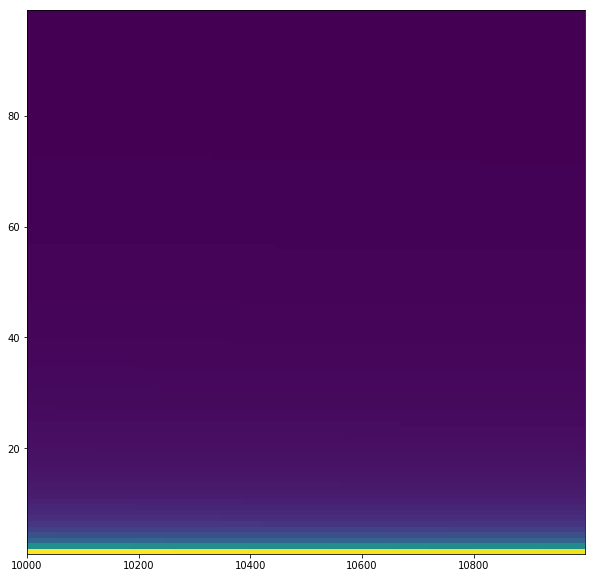

In [214]:
nps = np.arange(10_000, 11_000)
stp = np.arange(1, 100)

NPS, STP = np.meshgrid(nps, stp)
frames = (44100 - NPS + STP) // STP - 1919 # frames, should be 60
plt.pcolormesh(NPS, STP, frames)

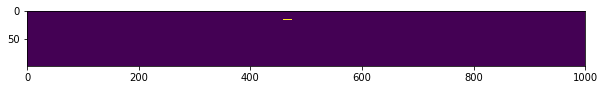

In [215]:
# np.count_nonzero(frames == 60)
plt.imshow(frames == 60)

In [182]:
x = audio
shape   = ((x.shape[0] - noverlap) // step, nperseg)
strides = (step * x.strides[-1], x.strides[-1])
audio_rolled = np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)
audio_rolled.shape

(1980, 10450)

In [183]:
# fake compute_spectrogram(chunk)
specgram = np.random.random((audio_rolled.shape[0], 1080))
specgram.shape
print(specgram.shape)
print(specgram.shape[0] - 1919)

(1980, 1080)
61


In [174]:
# now we roll this with 1px to get 60 1920px-width frames 
nperseg = 1920 #  
step = 1 # 1px
noverlap = nperseg - step
shape = ((specgram.shape[0] - noverlap) // step, nperseg)
print(shape)
strides = (step * specgram.strides[-1], specgram.strides[-1])
specgram_rolled  = np.lib.stride_tricks.as_strided(specgram, shape=shape, strides=strides)
specgram_rolled.shape

(64, 1920)


(64, 1920)

In [ ]:
(40000 - 9000) // 1000

In [43]:
stp = 469
(28081 + stp) // stp

60

In [22]:
sp_w = 1979
nov  = 1920 - 1 # sps - step
(sp_w - nov) // 1 # should be 60

60

2203123

In [56]:
# [         sp_w = 1979          ]
nps = 10_000
step = 17.235 # should ABAP (As Big As Possible)
nov = nps - step
(44100 - nov) // step # should be 1979 

1979.0

# better off

In [49]:
rate = 44100
seconds = 1

n = rate * seconds

print(n)

nperseg  = 9800/8 # something between 4k..20k
step     = 143/7  # should be as big as possible
noverlap = nperseg - step
fps = 60

# print(N / rate * fps)
# specgram_n = (n - noverlap) // step
# print(specgram_n)

frame_width = 1920 # frame_width
frame_step = 1 # px
# noverlap_2 = frame_width - frame_step
# print(specgram_n - noverlap_2 // step_2, seconds * fps)

print(((rate * seconds - (nperseg - step)) // step) - (frame_width - frame_step), seconds * fps)

44100
180.0 60


In [92]:
# rate = 44100*2
seconds = 1
n = rate * seconds
fps = 60

frame_width = 1920 # frame_width
frame_step = 1 # px

nps = np.arange(6000, 15000)
stp = np.arange(1, 1000)

NPS, STP = np.meshgrid(nps, stp)


EQUALITY = np.zeros(NPS.shape, dtype=np.bool)

for rate in np.arange(44100, 50000, 1000):
    EQUALITY += ((rate * seconds - (NPS - STP)) // STP) - frame_width + frame_step == seconds * fps

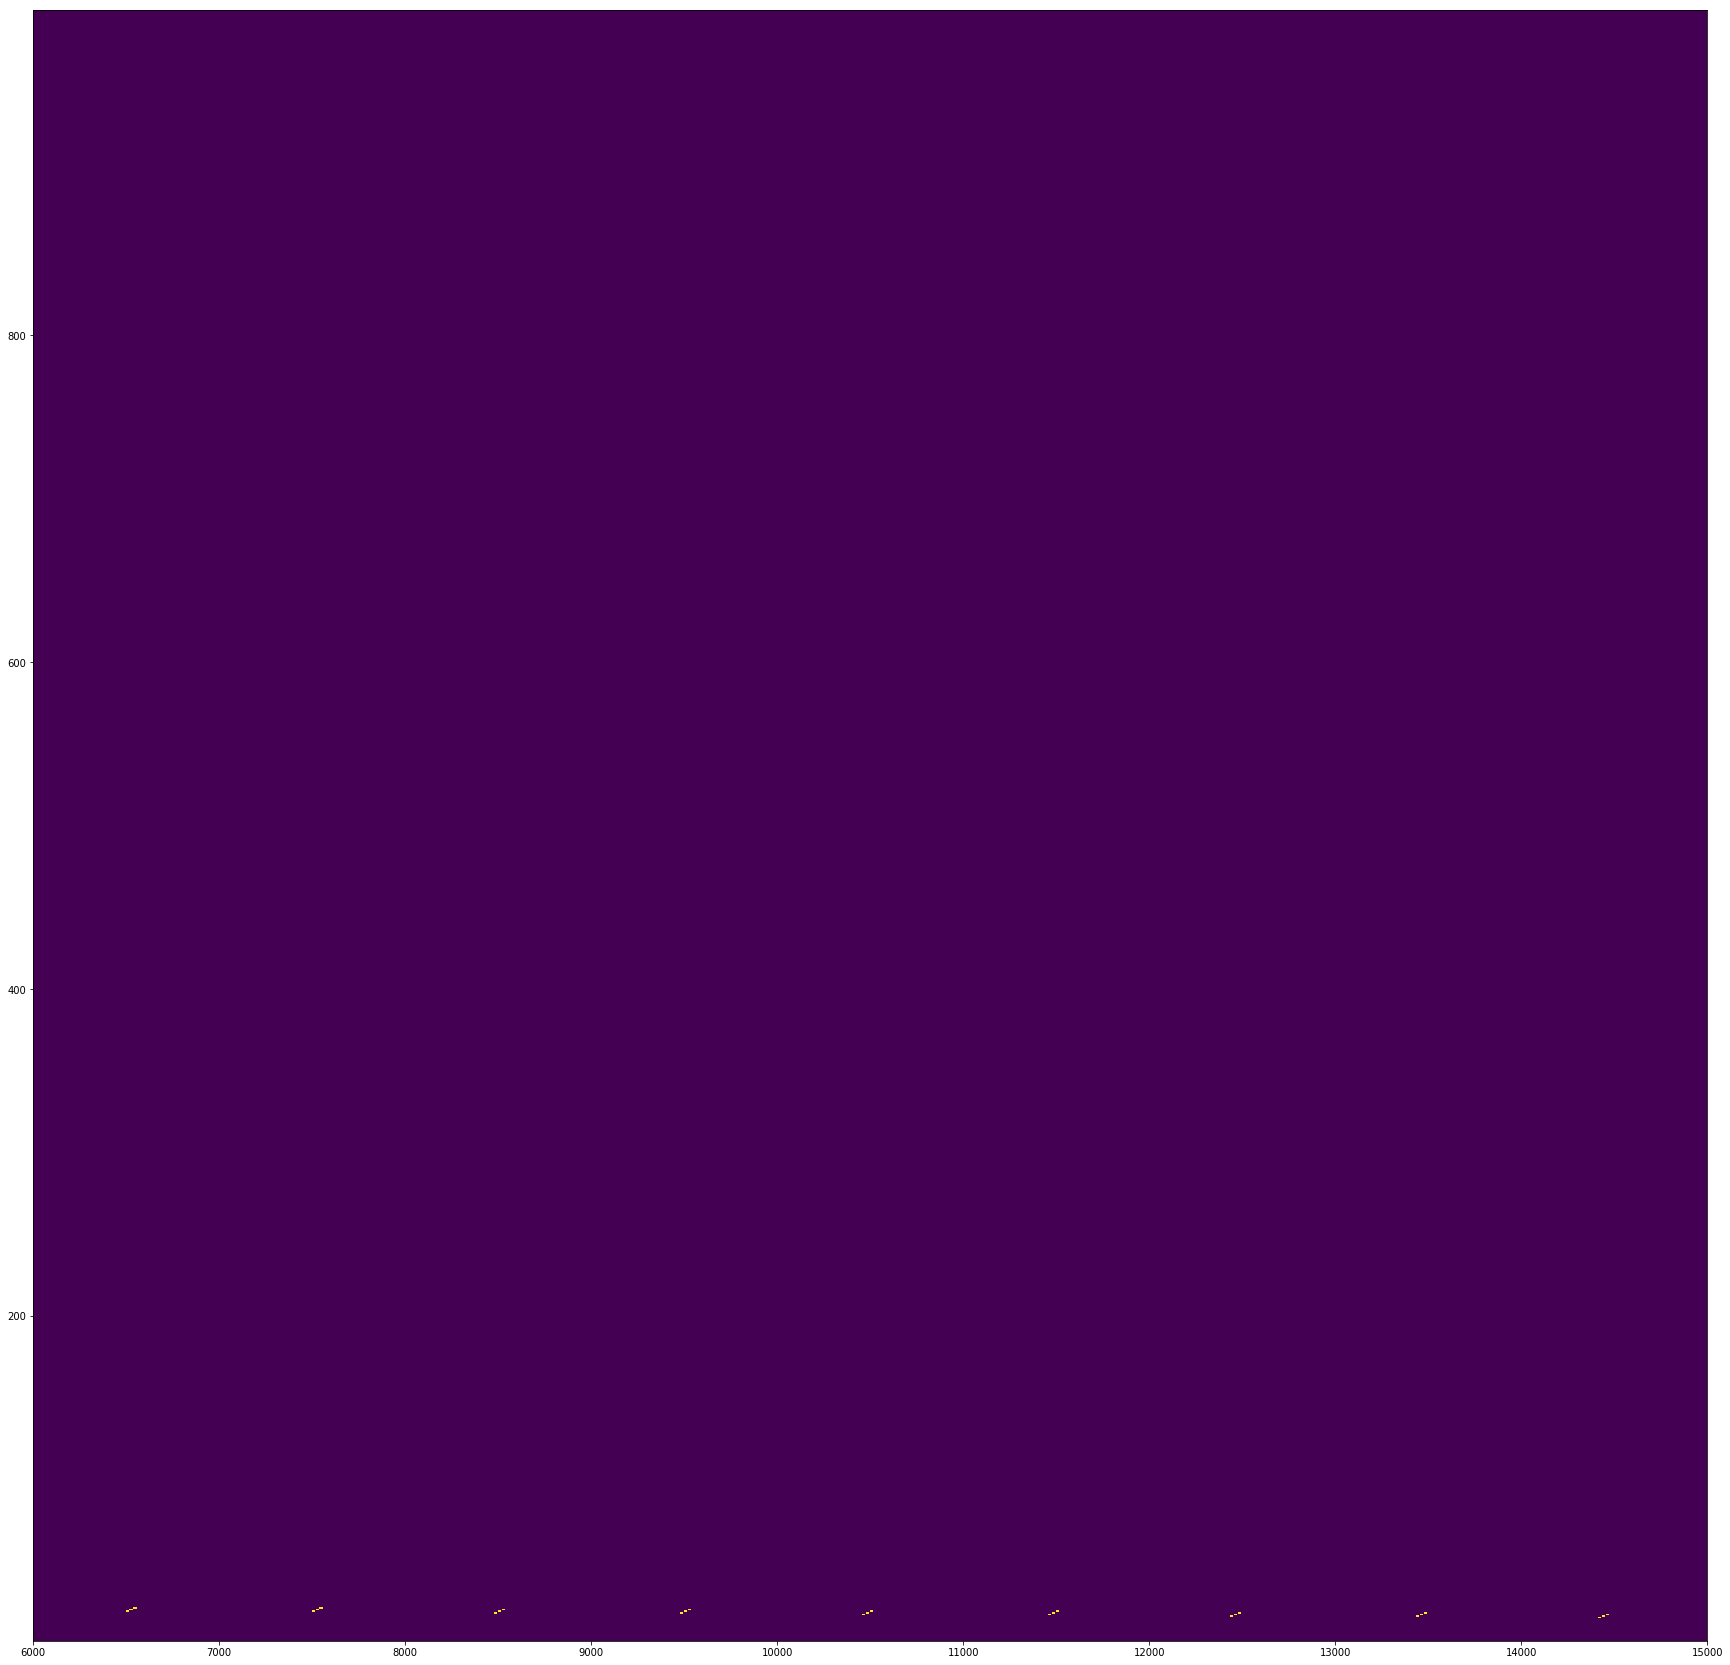

In [95]:
plt.pcolormesh(
    NPS, 
    STP, 
    EQUALITY
)

# helper

In [84]:
x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

X, Y = np.meshgrid(x, y)

EQUALITY = np.zeros(X.shape, dtype=np.bool)

for r in np.arange(100):
    EQUALITY += np.abs((X + 3 + r) - (Y - r/4)) < 0.1

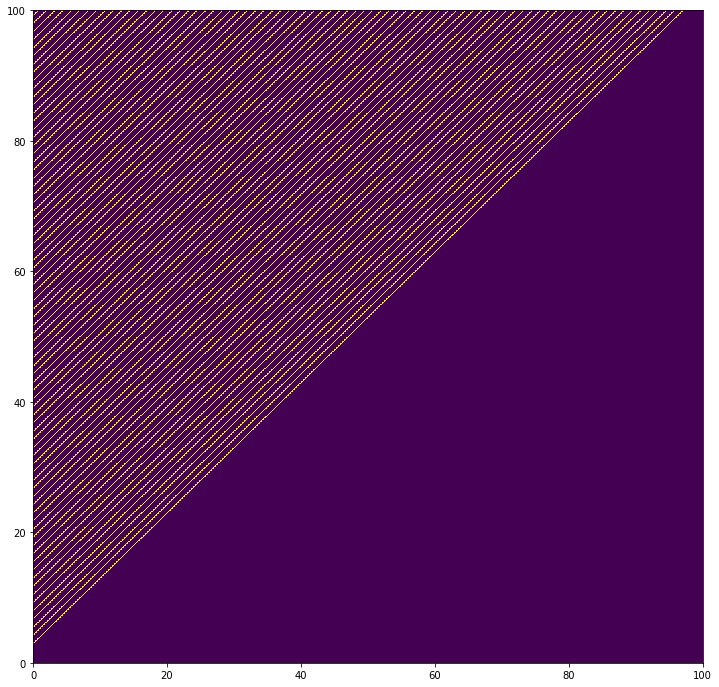

In [85]:
plt.pcolormesh(
    X, 
    Y, 
    EQUALITY
)